Reference: https://github.com/jdwittenauer/ipython-notebooks/blob/master/exercises/ML/ex1.pdf

# Machine Learning Exercise 1 - Linear Regression

This notebook covers a Python-based solution for the first programming exercise of the machine learning class on Coursera.  Please refer to the [exercise text](https://github.com/jdwittenauer/ipython-notebooks/blob/master/exercises/ML/ex1.pdf) for detailed descriptions and equations.

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem.  We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Hours Studied: The total number of hours each student spent studying.

Performance Index: The performance index of students, possibly reflecting their academic achievement or test scores.


In [28]:
data = pd.read_csv('Student_Performance.csv',usecols=['Hours_Studied', 'Performance_Index'])
data.head()

,Hours_Studied,Performance_Index
0,7,91.0
1,4,65.0
2,8,45.0
3,5,36.0
4,7,66.0


In [29]:
data.describe()

,Hours_Studied,Performance_Index
count,10000.000000,10000.000000
mean,4.992900,55.224800
std,2.589309,19.212558
min,1.000000,10.000000
25%,3.000000,40.000000
50%,5.000000,55.000000
75%,7.000000,71.000000
max,9.000000,100.000000


Let's plot it to get a better idea of what the data looks like.

<AxesSubplot:xlabel='Hours_Studied', ylabel='Performance_Index'>

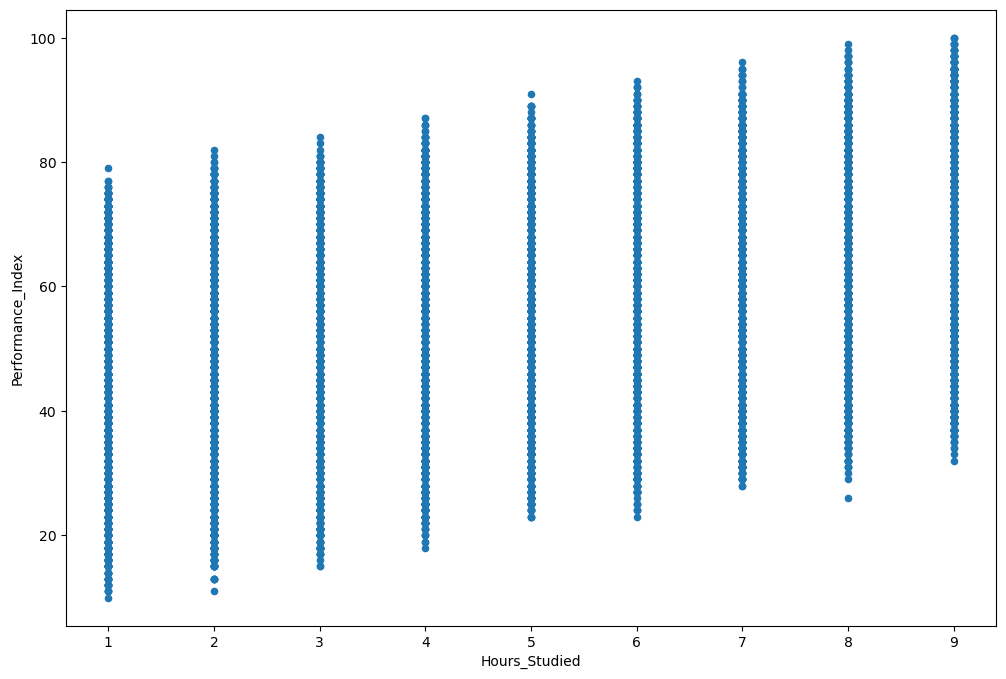

In [30]:
data.plot(kind='scatter', x='Hours_Studied', y='Performance_Index', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

In [31]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [32]:
data.insert(0, 'Ones', 1)

Now let's do some variable initialization.

In [33]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [34]:
X.head()

,Ones,Hours_Studied
0,1,7
1,1,4
2,1,8
3,1,5
4,1,7


In [35]:
y.head()

,Performance_Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  We also need to initialize theta.

In [36]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Here's what theta looks like.

In [37]:
theta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [38]:
X.shape, theta.shape, y.shape

((10000, 2), (1, 2), (10000, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [39]:
computeCost(X, y, theta)

1709.432

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

In [40]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [41]:
alpha = 0.001
iters = 50

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [42]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[1.58049562, 7.2977471 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [43]:
computeCost(X, y, g)

375.4370322253585

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Hours Studied vs. Performance Index')

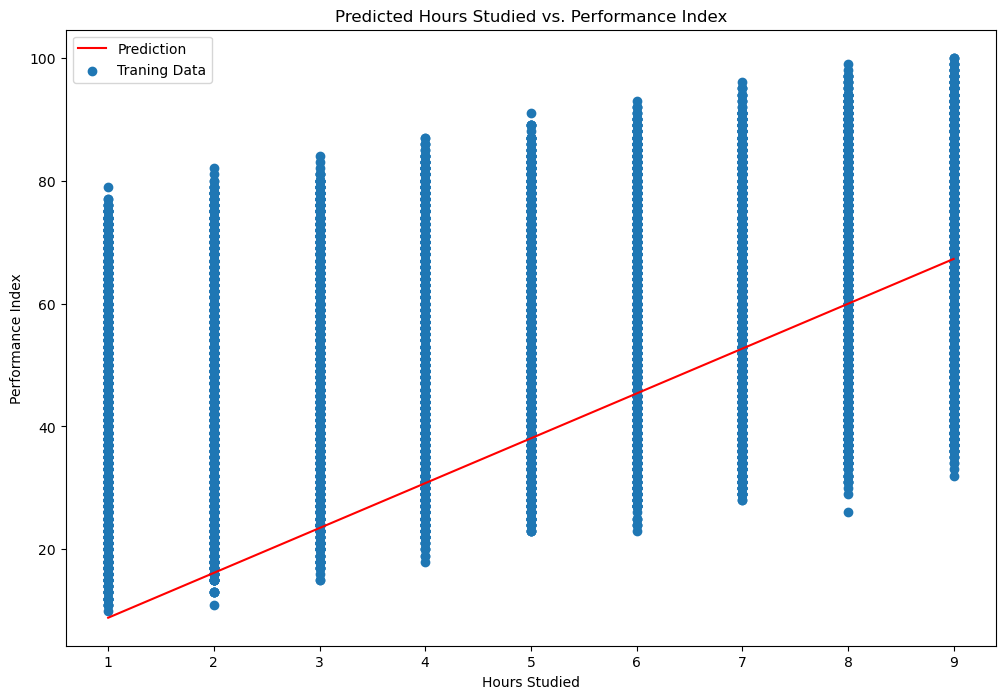

In [44]:
x = np.linspace(data.Hours_Studied.min(), data.Hours_Studied.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Hours_Studied, data.Performance_Index, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Performance Index')
ax.set_title('Predicted Hours Studied vs. Performance Index')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

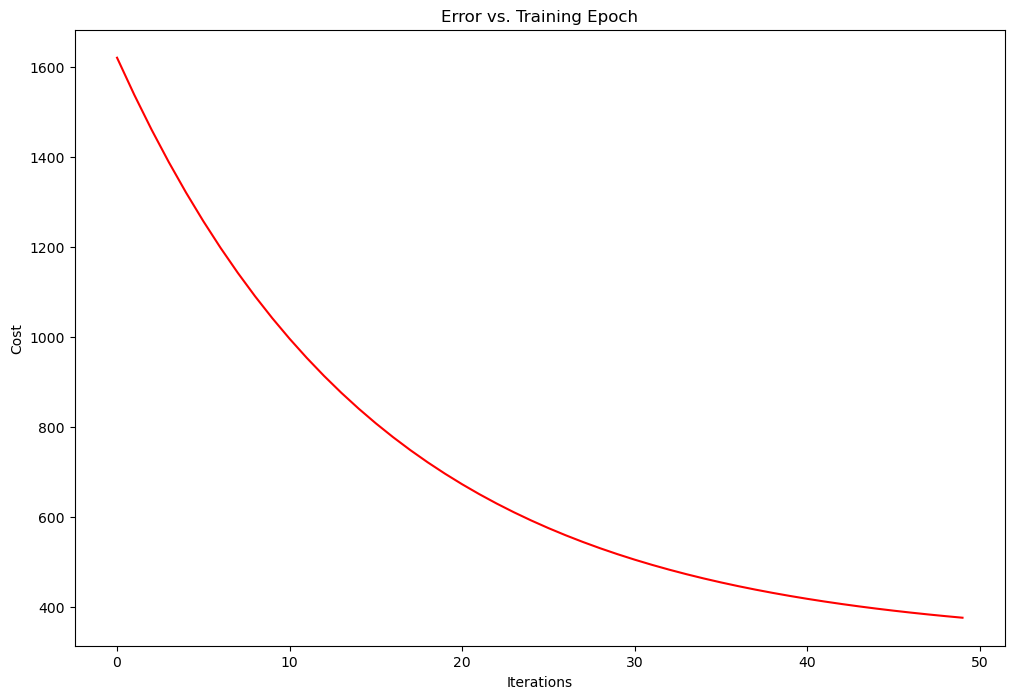

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Linear regression with multiple variables

In this part of the exercise, we will extend our linear regression model to handle multiple variables. We will continue to use the student performance dataset, this time considering additional variables like previous scores to predict the performance index.


In [46]:
data2 = pd.read_csv('Student_Performance.csv',usecols=['Hours_Studied', 'Previous_Scores', 'Performance_Index'])
data2.head()

,Hours_Studied,Previous_Scores,Performance_Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


For this task we add another pre-processing step - normalizing the features.  This is very easy with pandas.

In [47]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Hours_Studied,Previous_Scores,Performance_Index
0,0.775149,1.704090,1.862074
1,-0.383461,0.723876,0.508792
2,1.161352,-1.063573,-0.532194
3,0.002742,-1.005913,-1.000637
4,0.775149,0.320259,0.560842


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [48]:
alpha2 = 0.001
iters2 = 1000

In [49]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha2, iters2)

# get the cost (error) of the model
computeCost(X2, y2, g2)


0.07490283086173477

We can take a quick look at the training progess for this one as well.

Text(0.5, 1.0, 'Error vs. Training Epoch')

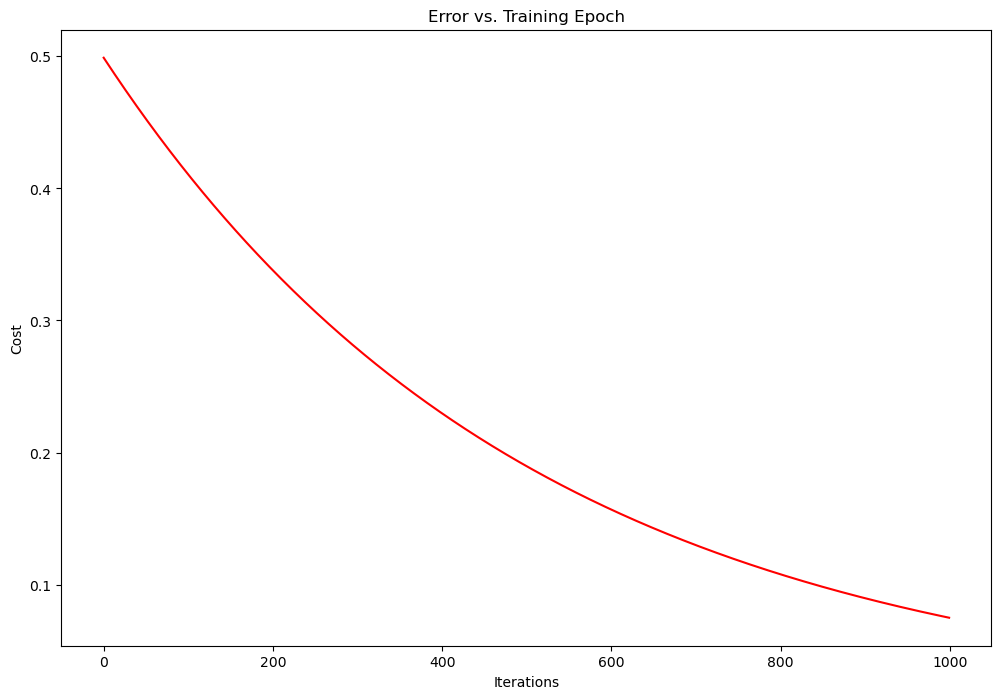

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters2), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [51]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

c:\Users\L\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\L\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

Here's what the scikit-learn model's predictions look like.

c:\Users\L\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 1.0, 'Predicted Profit vs. Hours_Studied')

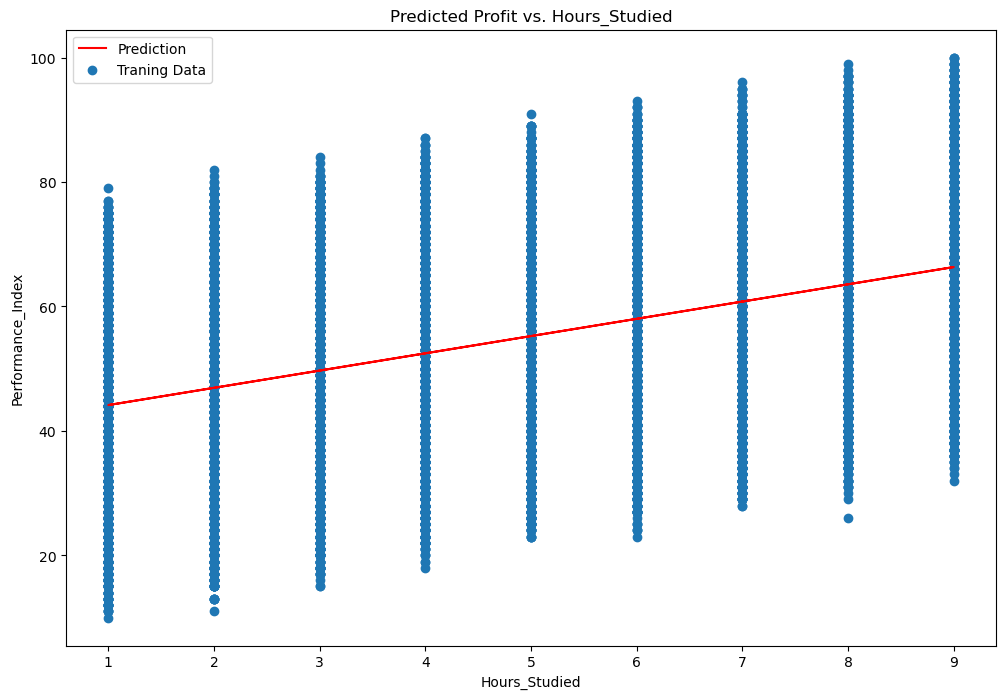

In [52]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Hours_Studied, data.Performance_Index, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Hours_Studied')
ax.set_ylabel('Performance_Index')
ax.set_title('Predicted Profit vs. Hours_Studied')

That's it!  Thanks for reading.  In Exercise 2 we'll take a look at logistic regression for classification problems.